In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [49]:
from torch.distributions.multivariate_normal import MultivariateNormal
import torch.distributions.normal as normal_distribution
import torch
import math

In [50]:
## for Palatino and other serif fonts use:
import seaborn as sns
# Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.25)
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'family': 'serif',
        'weight': 'bold',
        'serif': ['Palatino'],
        'size': 16}
rc('font', **font)
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams['axes.autolimit_mode']

'data'

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
current_dir = os.getcwd()
# print(current_dir)
# directory = '/Documents/project_robust_explanations/RobustExplanations/carla/recourse_invalidation_results/experiment_09_01_22/'

### ANN Models

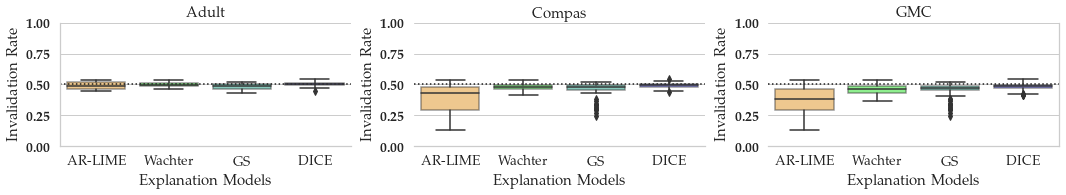

In [59]:
# ANN Models across data sets
color = 'nipy_spectral_r'
alpha = 0.5
intarget = "0.5"
model = 'ANN'
width = "50"
sigma2 = "0.01"

model_names = ['ar', 'wachter', 'gs', 'dice']
model_names_plot = ['AR-LIME', 'Wachter', 'GS', 'DICE']
data_names = ["adult", "compas", "give_me_some_credit"]
data_names_plot = ["Adult", "Compas" ,"GMC"]

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].set_ylim(0.0, 1)
ax[1].set_ylim(0.0, 1)
ax[2].set_ylim(0.0, 1)

ax[0].axhline(0.5, linestyle='dotted', label='Base', color='k')
ax[1].axhline(0.5, linestyle='dotted', label='Base', color='k')
ax[2].axhline(0.5, linestyle='dotted', label='Base', color='k')

ph1 = [] 
ph2 = []

it = 0
for data_name in data_names:
    jt = 0
    for model_name in model_names:
        
        if model_name == 'wachter_rip':
            intarget = "0.45"
        else:
            intarget = "0.5"

        df = pd.read_csv(current_dir + '/' + model_name + '_'+ data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/delta.csv')

        # identify values for which no CE could be found!
        df2 = pd.read_csv(current_dir + '/' + model_name + '_' + data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/counterfactual.csv')
        df1 = pd.read_csv(current_dir + '/' + model_name + '_' + data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/factual.csv')

        ce_class = df2['prediction'].values
        ce_class_idx = np.where(ce_class==1)[0]

        ce_norm = np.linalg.norm(df2.values[ce_class_idx] - df1.values[ce_class_idx], axis=1)
        df = df.values[ce_class_idx]

        ph1 = ph1 + list(df)
        ph2 = ph2 + list(np.repeat(model_names_plot[jt], df.shape[0]))
        
        jt += 1

    values = np.array(ph1).reshape(-1, 1)
    names = np.array(ph2).reshape(-1, 1)
    df = np.c_[values, names]
    df = pd.DataFrame(df)
    df.columns = ['RIP', 'Model']
    df["RIP"] = pd.to_numeric(df["RIP"])

    sns.boxplot(y="RIP", x="Model", data=df, ax=ax[it], palette=color, boxprops=dict(alpha=alpha))
    ax[it].set_xlabel('Explanation Models')
    ax[it].set_title(data_names_plot[it])
    ax[it].spines['top'].set_visible(False)
    ax[it].set_ylabel('Invalidation Rate')
    
    if it == 0:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['right'].set_visible(False)
    elif it == 1:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['left'].set_visible(False)
        ax[it].spines['right'].set_visible(False)
    else:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['left'].set_visible(False)
    it += 1
    
fig.tight_layout()
fig.savefig(current_dir + '/' + 'rips_' + "all_datasets" +  '_' + "all_models" + '_' + 'width_' + width + '_sigma2_' + sigma2 + '.pdf')

### Linear Models

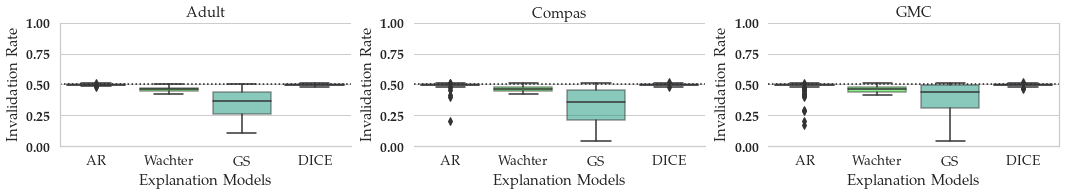

In [61]:
# ANN Models across data sets
color = 'nipy_spectral_r'
alpha = 0.5
intarget = "0.2"
model = 'Linear'
width = "0"
sigma2 = "0.01"

model_names = ['ar', 'wachter', 'gs', 'dice']
model_names_plot = ['AR', 'Wachter', 'GS', 'DICE']
data_names = ["adult", "compas", "give_me_some_credit"]
data_names_plot = ["Adult", "Compas" ,"GMC"]

fig, ax = plt.subplots(1, 3, figsize=(15, 3))

ax[0].set_ylim(0.20, 0.65)
ax[1].set_ylim(0.20, 0.65)
ax[2].set_ylim(0.20, 0.65)

ax[0].axhline(0.5, linestyle='dotted', label='Base', color='k')
ax[1].axhline(0.5, linestyle='dotted', label='Base', color='k')
ax[2].axhline(0.5, linestyle='dotted', label='Base', color='k')

ph1 = [] 
ph2 = []

it = 0
for data_name in data_names:
    jt = 0
    for model_name in model_names:
        
        if model_name == 'wachter_rip':
            intarget = "0.45"
        else:
            intarget = "0.5"

        df = pd.read_csv(current_dir + '/' + model_name + '_'+ data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/delta.csv')

        # identify values for which no CE could be found!
        df2 = pd.read_csv(current_dir + '/' + model_name + '_' + data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/counterfactual.csv')
        df1 = pd.read_csv(current_dir + '/' + model_name + '_' + data_name + '_' + model + '_' + width + '_sigma2_' + sigma2 + '_intarget_' + intarget + '/factual.csv')

        ce_class = df2['prediction'].values
        ce_class_idx = np.where(ce_class==1)[0]

        ce_norm = np.linalg.norm(df2.values[ce_class_idx] - df1.values[ce_class_idx], axis=1)
        df = df.values[ce_class_idx]

        ph1 = ph1 + list(df)
        ph2 = ph2 + list(np.repeat(model_names_plot[jt], df.shape[0]))
        
        jt += 1

    values = np.array(ph1).reshape(-1, 1)
    names = np.array(ph2).reshape(-1, 1)
    df = np.c_[values, names]
    df = pd.DataFrame(df)
    df.columns = ['RIP', 'Model']
    df["RIP"] = pd.to_numeric(df["RIP"])

    sns.boxplot(y="RIP", x="Model", data=df, ax=ax[it], palette=color, boxprops=dict(alpha=alpha))
    ax[it].set_xlabel('Explanation Models')
    ax[it].set_title(data_names_plot[it])
    ax[it].spines['top'].set_visible(False)
    ax[it].set_ylabel('Invalidation Rate')
    ax[it].set_ylim([0,1])
    
    if it == 0:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['right'].set_visible(False)
    elif it == 1:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['left'].set_visible(False)
        ax[it].spines['right'].set_visible(False)
    else:
        ax[it].spines['top'].set_visible(False)
        ax[it].spines['left'].set_visible(False)
    it += 1
    
fig.tight_layout()
fig.savefig(current_dir + '/' + 'rips_' + "all_datasets" +  '_' + "all_linear_models" + '_' + 'width_' + width + '_sigma2_' + sigma2 + '.pdf')